In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression


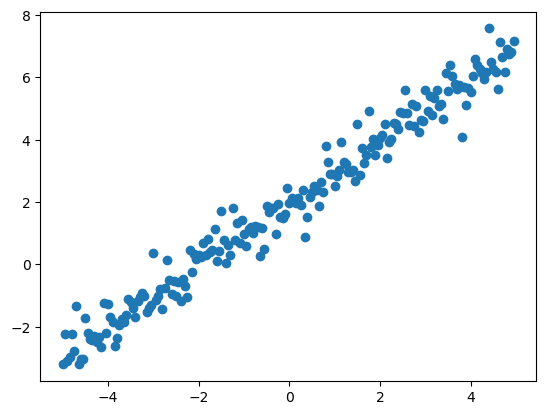

In [21]:
nb_samples = 200

# Generate data
X = np.linspace(-5, 5, nb_samples)  # Ensure exactly 200 points
Y = X + 2 + np.random.normal(0.0, 0.5, size=nb_samples)

# Plot data
plt.scatter(X, Y)
plt.show()


In [24]:
# functions
def loss(v):
    """_summary_

    Args:
        v (np_array): numpy array containing fitted parameters 

    Returns:
        scalar: summed loss
    """
    e = 0.0
    for i in range(nb_samples):
        e += np.square(v[0] + v[1] * X[i] - Y[i])
    return 0.5 * e
    
    
def gradient(v):
    g = np.zeros(shape=2)
    for i in range(nb_samples):
        g[0] += (v[0] + v[1] * X[i] - Y[i])
        g[1] += (v[0] + v[1] * X[i] - Y[i]) * X[i]
    return g




In [25]:
result=minimize(fun=loss, x0=[0.0, 0.0], jac=gradient, method='Powell')
print(result)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 23.02978253469006
       x: [ 1.985e+00  9.882e-01]
     nit: 3
   direc: [[ 0.000e+00  1.000e+00]
           [ 1.853e-06  5.558e-09]]
    nfev: 96


/Users/johannabayer/anaconda3/envs/ML_env/lib/python3.11/site-packages/scipy/optimize/_minimize.py:560: RuntimeWarning: Method Powell does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


In [26]:
X.shape
Y.shape

X= X.reshape(-1,1)
X.shape

(200, 1)

In [27]:


reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

0.9724758702419277

In [28]:
print(reg.coef_)
print(reg.intercept_)

[0.98815162]
1.9846741982667637


L1, L2, and Elastic Net

L1: 

In [29]:
# L1 (Lasso) Loss function
def loss_l1(v, alpha=1.0):
    """Calculate the L1 loss for linear regression with regularization."""
    e = 0.0
    for i in range(nb_samples):
        e += np.square(v[0] + v[1] * X[i] - Y[i])
    # L1 regularization term
    l1_penalty = alpha * (np.abs(v[0]) + np.abs(v[1]))
    return 0.5 * e + l1_penalty

# L2 (Ridge) Loss function
def loss_l2(v, alpha=1.0):
    """Calculate the L2 loss for linear regression with regularization."""
    e = 0.0
    for i in range(nb_samples):
        e += np.square(v[0] + v[1] * X[i] - Y[i])
    # L2 regularization term
    l2_penalty = alpha * (v[0]**2 + v[1]**2)
    return 0.5 * e + l2_penalty

# Elastic Net Loss function
def loss_elastic_net(v, alpha=1.0, l1_ratio=0.5):
    """Calculate the elastic net loss for linear regression with regularization."""
    e = 0.0
    for i in range(nb_samples):
        e += np.square(v[0] + v[1] * X[i] - Y[i])
    # Elastic net regularization term
    l1_penalty = l1_ratio * (np.abs(v[0]) + np.abs(v[1]))
    l2_penalty = (1 - l1_ratio) * (v[0]**2 + v[1]**2)
    elastic_penalty = alpha * (l1_penalty + l2_penalty)
    return 0.5 * e + elastic_penalty

# Gradient function for L2 (can be used with Elastic Net too)
def gradient_l2(v, alpha=1.0):
    """Calculate the gradient for L2 regularization."""
    g = np.zeros(2)
    for i in range(nb_samples):
        g[0] += (v[0] + v[1] * X[i] - Y[i])
        g[1] += (v[0] + v[1] * X[i] - Y[i]) * X[i]
    # Gradient of L2 penalty
    g[0] += alpha * v[0]
    g[1] += alpha * v[1]
    return g

# Perform optimization for L1
result_l1 = minimize(fun=loss_l1, x0=[0.0, 0.0], method='Powell')
print("L1 Regression Result:", result_l1)

# Perform optimization for L2
result_l2 = minimize(fun=loss_l2, x0=[0.0, 0.0], jac=gradient_l2, method='CG')
print("L2 Regression Result:", result_l2)

# Perform optimization for Elastic Net
result_elastic_net = minimize(fun=loss_elastic_net, x0=[0.0, 0.0], method='Powell')
print("Elastic Net Regression Result:", result_elastic_net)

L1 Regression Result:  message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 25.99979316229989
       x: [ 1.980e+00  9.875e-01]
     nit: 3
   direc: [[ 0.000e+00  1.000e+00]
           [ 1.852e-06  5.554e-09]]
    nfev: 85
L2 Regression Result:  message: Desired error not necessarily achieved due to precision loss.
 success: False
  status: 2
     fun: 27.90897580872271
       x: [ 1.971e+00  9.877e-01]
     nit: 4
     jac: [-7.708e-01  3.270e-01]
    nfev: 63
    njev: 51
Elastic Net Regression Result:  message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 26.95780557316277
       x: [ 1.972e+00  9.872e-01]
     nit: 3
   direc: [[ 0.000e+00  1.000e+00]
           [ 1.831e-06  5.491e-09]]
    nfev: 110


/var/folders/bx/z6474k1x4hl7tmn54rd53x3m0000gn/T/ipykernel_21797/3781318722.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  g[0] += (v[0] + v[1] * X[i] - Y[i])
/var/folders/bx/z6474k1x4hl7tmn54rd53x3m0000gn/T/ipykernel_21797/3781318722.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  g[1] += (v[0] + v[1] * X[i] - Y[i]) * X[i]


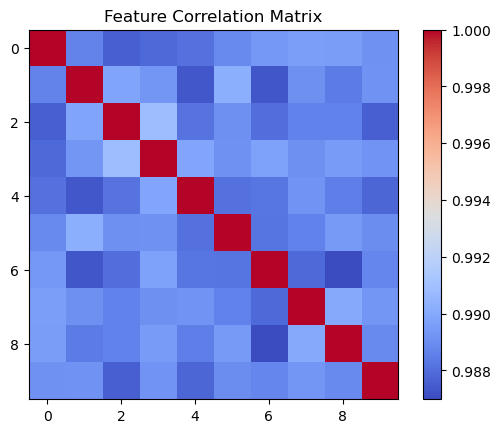

L1 Regression Result Coefficients: [ 9.71634607e-01 -7.26680967e-01  1.93084142e+00  3.39217596e-12
  2.11405415e-01  3.24240949e-12  1.07202636e-02 -1.33974990e-09
  2.26291584e-03  1.49182242e-01]
L2 Regression Result Coefficients: [ 0.7559045  -0.85129315  1.27385978  0.12414458  0.31584347  0.00414326
  0.26142851  0.12972388  0.30222298  0.2423543 ]
Elastic Net Regression Result Coefficients: [ 8.28128716e-01 -8.34149177e-01  1.59129643e+00  2.32261326e-10
  3.69882644e-01 -9.21976505e-13  2.24251574e-01  7.92474709e-02
  2.40481786e-02  2.75442322e-01]


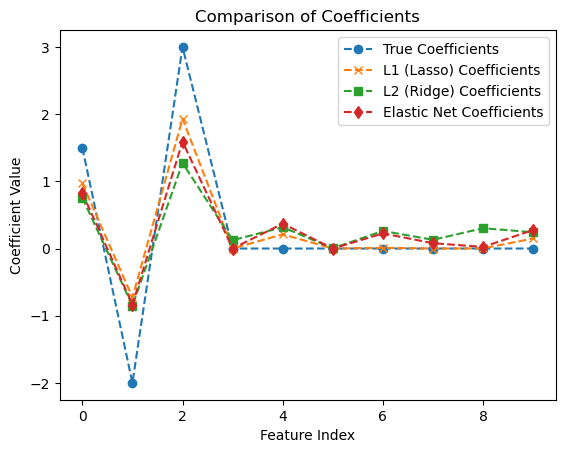

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Number of samples and features
nb_samples = 200
nb_features = 10

# Generate synthetic data with correlated features
np.random.seed(42)  # For reproducibility
X_base = np.random.randn(nb_samples, 1)
X = np.hstack([X_base + 0.1 * np.random.randn(nb_samples, 1) for _ in range(nb_features)])

# True coefficients, only a few are non-zero (sparse)
true_coefficients = np.zeros(nb_features)
true_coefficients[:3] = [1.5, -2.0, 3.0]  # Only the first three features are relevant

# Generate target variable with some noise
Y = X @ true_coefficients + np.random.normal(0.0, 0.5, size=nb_samples)

# Plotting the correlation matrix to show multicollinearity
plt.imshow(np.corrcoef(X, rowvar=False), cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Feature Correlation Matrix")
plt.show()

# L1 (Lasso) Loss function
def loss_l1(v, alpha=1.0):
    """Calculate the L1 loss for linear regression with regularization."""
    e = 0.0
    for i in range(nb_samples):
        e += np.square(np.dot(X[i], v) - Y[i])
    # L1 regularization term
    l1_penalty = alpha * np.sum(np.abs(v))
    return 0.5 * e + l1_penalty

# L2 (Ridge) Loss function
def loss_l2(v, alpha=1.0):
    """Calculate the L2 loss for linear regression with regularization."""
    e = 0.0
    for i in range(nb_samples):
        e += np.square(np.dot(X[i], v) - Y[i])
    # L2 regularization term
    l2_penalty = alpha * np.sum(v**2)
    return 0.5 * e + l2_penalty

# Elastic Net Loss function
def loss_elastic_net(v, alpha=1.0, l1_ratio=0.5):
    """Calculate the elastic net loss for linear regression with regularization."""
    e = 0.0
    for i in range(nb_samples):
        e += np.square(np.dot(X[i], v) - Y[i])
    # Elastic net regularization term
    l1_penalty = l1_ratio * np.sum(np.abs(v))
    l2_penalty = (1 - l1_ratio) * np.sum(v**2)
    elastic_penalty = alpha * (l1_penalty + l2_penalty)
    return 0.5 * e + elastic_penalty

# Perform optimization for L1
result_l1 = minimize(fun=loss_l1, x0=np.zeros(nb_features), method='Powell')
print("L1 Regression Result Coefficients:", result_l1.x)

# Perform optimization for L2
result_l2 = minimize(fun=loss_l2, x0=np.zeros(nb_features), method='Powell')
print("L2 Regression Result Coefficients:", result_l2.x)

# Perform optimization for Elastic Net
result_elastic_net = minimize(fun=loss_elastic_net, x0=np.zeros(nb_features), method='Powell')
print("Elastic Net Regression Result Coefficients:", result_elastic_net.x)

# Plotting the results
plt.plot(true_coefficients, label='True Coefficients', linestyle='--', marker='o')
plt.plot(result_l1.x, label='L1 (Lasso) Coefficients', linestyle='--', marker='x')
plt.plot(result_l2.x, label='L2 (Ridge) Coefficients', linestyle='--', marker='s')
plt.plot(result_elastic_net.x, label='Elastic Net Coefficients', linestyle='--', marker='d')
plt.title("Comparison of Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()
